# Task 2

In [264]:
import pandas as pd

In [265]:
order_items_path = '/Users/sviat/Downloads/OneDrive_1_30-04-2024/S_Data/order_items.csv'
products_path = '/Users/sviat/Downloads/OneDrive_1_30-04-2024/S_Data/products.csv'
orders_path  = '/Users/sviat/Downloads/OneDrive_1_30-04-2024/S_Data/orders.csv'

In [266]:
order_items_ds = pd.read_csv(order_items_path)
products_ds = pd.read_csv(products_path)

In [267]:
df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [268]:
df = order_items_ds.join(products_ds.set_index('product_id'),on='product_id')

return dataframe for specific category sorted by sales

In [269]:
def category_seller(df,category):
    dfc = df[df['product_category_name']==category]
    dfc = dfc.groupby(['seller_id']).order_id.count().reset_index(name='sales')
    dfc.index = dfc['seller_id']
    dfc = dfc.drop(columns=['seller_id'])
    dfc = dfc.sort_values(by=['sales'])
    return dfc

In [270]:
products_categories = products_ds['product_category_name'].unique()

In [271]:
def best_worst_sellers(df,cat):
    for i in cat:
        dfc = category_seller(df,i)
        if dfc.size>0:
            print("best seller in category {category}:{id}".format(category=i,id = dfc.iloc[-1].name))
            print("worst seller in category {category}:{id}".format(category=i,id = dfc.iloc[0].name))


## SELLERS ANALYTICS

In [272]:
best_worst_sellers(df,products_categories)

best seller in category perfumaria:cc419e0650a3c5ba77189a1882b7556a
worst seller in category perfumaria:83645b1645cdee8953ee54c29ceed564
best seller in category artes:c31eff8334d6b3047ed34bebd4d62c36
worst seller in category artes:f593898ec748b7a8cb81fc04edafd98a
best seller in category esporte_lazer:218d46b86c1881d022bce9c68a7d4b15
worst seller in category esporte_lazer:001e6ad469a905060d959994f1b41e4f
best seller in category bebes:855668e0971d4dfd7bef1b6a4133b41b
worst seller in category bebes:d2df77822373f19934e87694d8640767
best seller in category utilidades_domesticas:53e4c6e0f4312d4d2107a8c9cddf45cd
worst seller in category utilidades_domesticas:7e3dde9ffba72d5340f9aaf09b4424be
best seller in category instrumentos_musicais:f5a590cf36251cf1162ea35bef76fe84
worst seller in category instrumentos_musicais:ff1e15b778c700abdd4d239b81ac466d
best seller in category cool_stuff:7a67c85e85bb2ce8582c35f2203ad736
worst seller in category cool_stuff:82bd0703a4aefd6b599e5bfdaed378fb
best seller

In [273]:
sellers = df.groupby(['seller_id']).order_id.count().reset_index(name='sales')
sellers.index = sellers['seller_id']
sellers = sellers.drop(columns=['seller_id'])
sellers =sellers.sort_values(by=['sales'])

<Axes: title={'center': 'top 10 best sellers'}, ylabel='seller_id'>

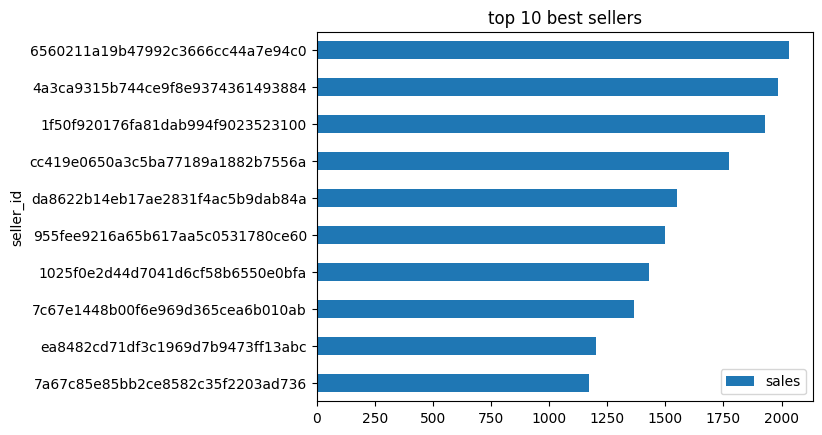

In [274]:
sellers[-10:].plot.barh(title = "top 10 best sellers")

<Axes: title={'center': 'top 10 worst sellers'}, ylabel='seller_id'>

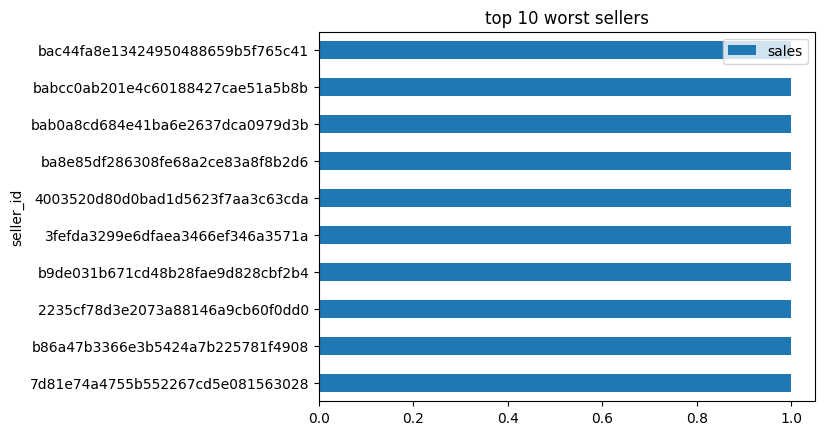

In [275]:
sellers[:10].plot.barh(title = "top 10 worst sellers")

In [276]:
cool_stuff = category_seller(df,'cool_stuff')

### SELLERS SEGMENTATION

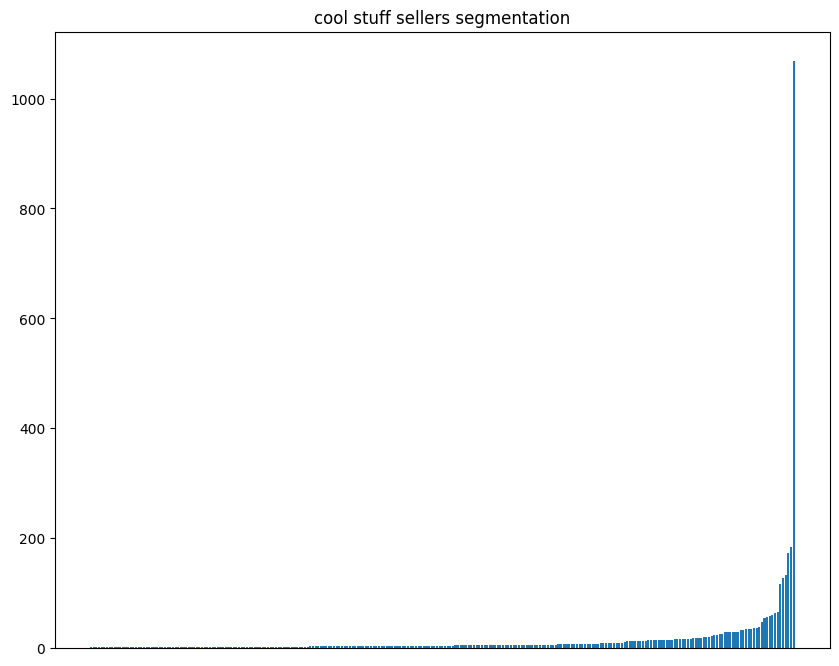

In [277]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,8))
plt.bar(cool_stuff.index,cool_stuff.sales)
plt.xticks([])
plt.title('cool stuff sellers segmentation')
plt.show()

<Axes: title={'center': 'top 10 best seller cool stuff'}, ylabel='seller_id'>

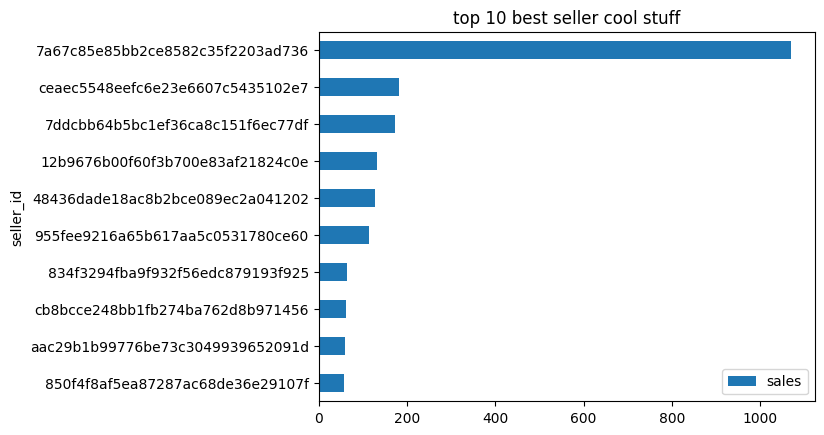

In [278]:
cool_stuff[-10:].plot.barh(title='top 10 best seller cool stuff')

<Axes: title={'center': 'top 10 worst seller cool stuff'}, ylabel='seller_id'>

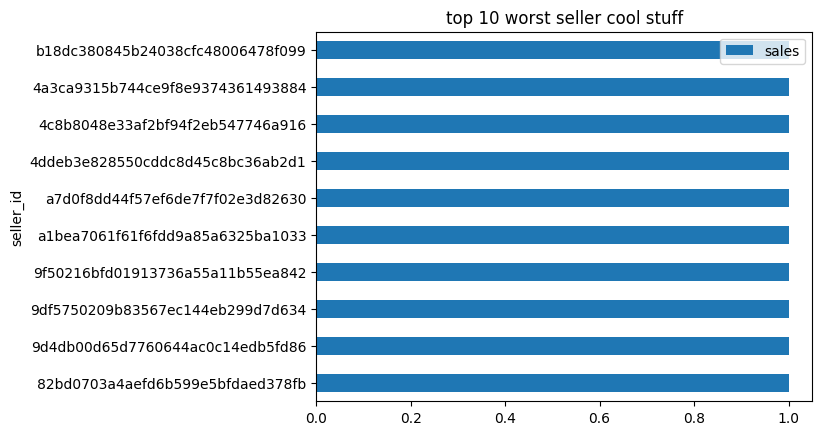

In [279]:
cool_stuff[:10].plot.barh(title='top 10 worst seller cool stuff')

## PRODUCTS ANALYTICS

In [280]:
def category_products(df,category):
    dfc = df[df['product_category_name']==category]
    dfc = dfc.groupby(['product_id']).order_id.count().reset_index(name='sales')
    dfc.index = dfc['product_id']
    dfc = dfc.drop(columns=['product_id'])
    dfc = dfc.sort_values(by=['sales'])
    return dfc

In [281]:
cool_stuff_products = category_products(df,'cool_stuff')

<Axes: title={'center': 'best sales products in category coll stuff'}, ylabel='product_id'>

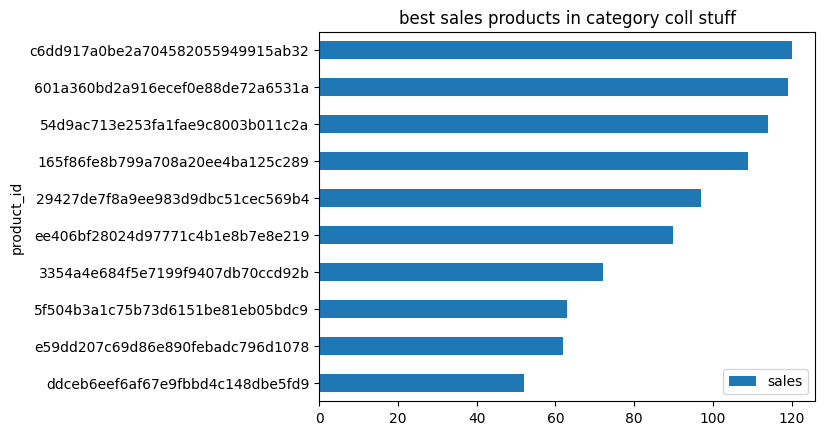

In [282]:
cool_stuff_products[-10:].plot.barh(title = 'best sales products in category coll stuff')

<Axes: title={'center': 'worst sales products in category coll stuff'}, ylabel='product_id'>

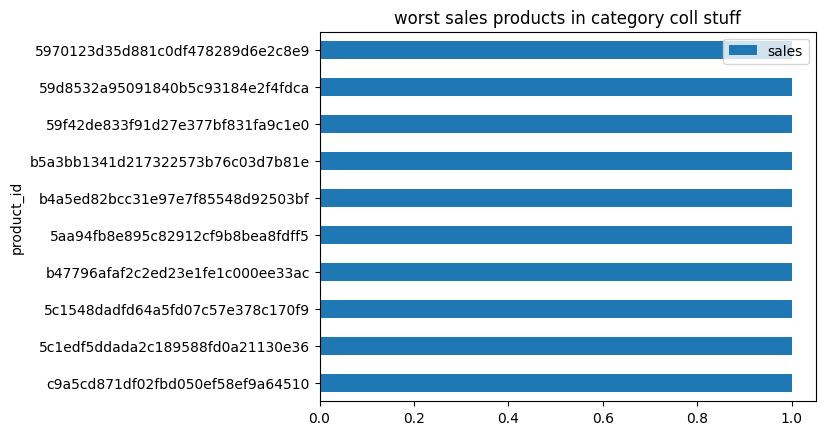

In [283]:
cool_stuff_products[:10].plot.barh(title = 'worst sales products in category coll stuff')

Text(0.5, 1.0, 'dependence of sales on weight')

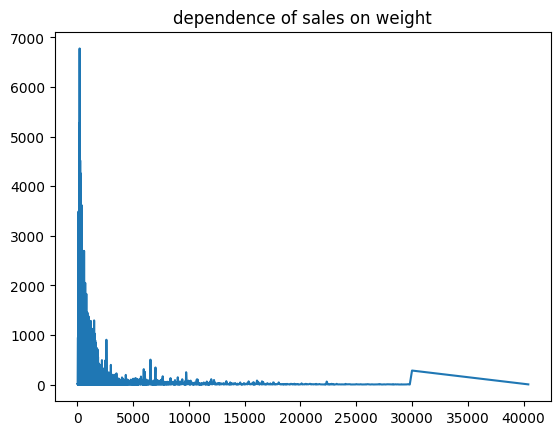

In [284]:
products_sales = df.groupby(['product_weight_g']).product_weight_g.count().reset_index(name='sales')
plt.plot(products_sales['product_weight_g'],products_sales['sales'])
plt.title('dependence of sales on weight')

Text(0.5, 1.0, 'dependence of sales on price')

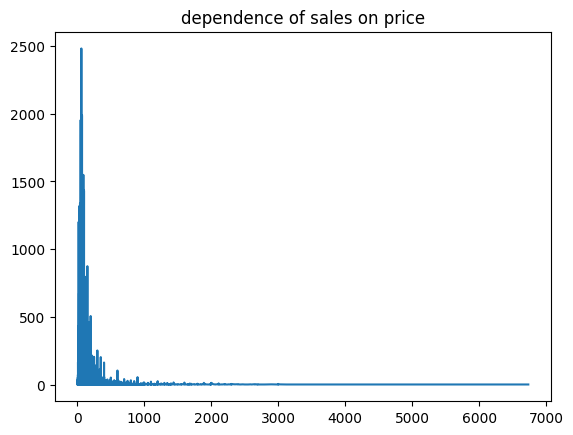

In [285]:
products_sales = df.groupby(['price']).price.count().reset_index(name='sales')
plt.plot(products_sales['price'],products_sales['sales'])
plt.title('dependence of sales on price')


## Conclusion

Through this analysis, potential revenue can be increased by focusing on supporting top-performing sellers and products, while shifting focus away from underperforming sellers. Additionally, data on the dependence of turnover on price can provide insights into customer affordability, and data on the dependence of turnover on weight allows for better collaboration with delivery services, as well as optimizing the delivery process.